In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from config import config

In [3]:
df = pd.read_csv(config.paths[config.task.name].keyframes_csv, header=0, names=('timestamp', 'filename', 'px', 'py', 'pz', 'qw', 'qx', 'qy', 'qz'), usecols=('timestamp', 'filename'))

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ns')
df = df.sort_values(by='timestamp')

In [8]:
def image_exists(filename):
    image_path = Path(f"{config.paths[config.task.name].images}/{filename.strip()}")
    return image_path.exists()

df = df[df['filename'].apply(image_exists)].reset_index(drop=True)

In [9]:
df.head(3)

,timestamp,filename
0,1970-01-01 02:24:17.516925124,8657519072990.png
1,1970-01-01 02:24:17.550229924,8657552377790.png
2,1970-01-01 02:24:17.583504024,8657585651890.png


In [10]:
image_names = df['filename'].tolist()

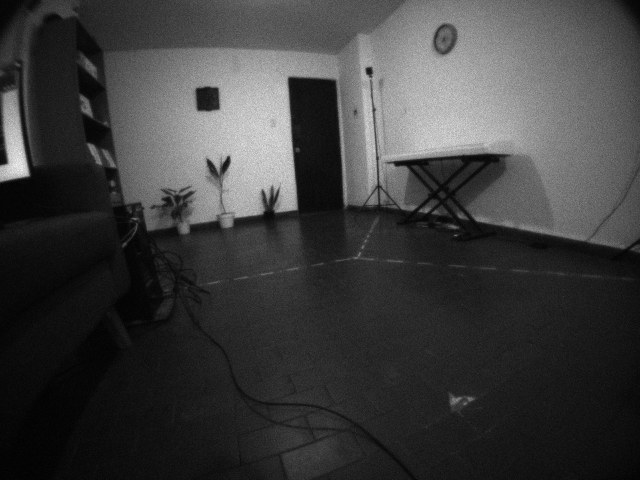

KeyboardInterrupt: 

In [13]:
import time
from IPython.display import display, clear_output
from PIL import Image


# Display the slideshow
def display_slideshow(delay=2):
    for name in image_names:
        filepath = Path(f"{config.paths[config.task.name].images}/{name.strip()}")
        # Open and display the image
        img = Image.open(filepath)
        display(img)

# Run the slideshow
display_slideshow(delay=2)  # Change delay (in seconds) as needed
